In [1]:
import pandas as pd 
import numpy as np

In [2]:
data_raw = pd.read_excel("data.xlsx")
weights = data_raw[["Weight"]]
scenarios = data_raw.drop(columns = ["Weight", "Unnamed: 36"])

In [3]:
from entropy_pooling import views

(A,b,C,d) = views.load();

     pcost       dcost       gap    pres   dres
 0: -1.9348e+00 -1.9350e+00  2e-04  0e+00  7e-01
 1: -1.9348e+00 -1.9348e+00  2e-06  1e-19  7e-03
 2: -1.9348e+00 -1.9348e+00  2e-08  1e-19  2e-04
 3: -1.9348e+00 -1.9348e+00  5e-10  3e-19  1e-05
 4: -1.9348e+00 -1.9348e+00  6e-12  1e-19  8e-08
Optimal solution found.
   Global Equities  DM Equities
0         0.002926     0.005525


In [4]:
from entropy_pooling import entropy_minimizer
c = 0.5
p = np.array(weights)
m,n = p.shape

posterior = entropy_minimizer.full_confidence_posterior(p, A,b,C,d)
weighted_posterior = entropy_minimizer.confidence_weighted_posterior(p, posterior, c)

Results
Optimal dual variable values:  [ 1.18769748e+03  8.16045634e+00 -9.25798809e-01  3.56751687e+01
 -8.81393227e+00]
Jacobian matrix at optimum [-0.00477162 -0.39780902 -0.39250769  0.01746194 -0.473752  ]


In [5]:
from entropy_pooling import markoviz_optimizer

deltas, asset_names = markoviz_optimizer.load_asset_deltas("entropy_pooling/deltas.xlsx")

asset_scenarios = markoviz_optimizer.asset_scenarios(scenarios, deltas, asset_names)
asset_scenarios.head()

,Kesko,UPM,Fortum,Apple
0,3.742077,4.989436,7.592619,4.983188
1,-1.743102,-2.324136,-3.536729,1.468509
2,3.222797,4.297062,6.539008,8.579736
3,-2.270124,-3.026832,-4.606048,-3.290835
4,1.501175,2.001567,3.045863,4.251661


The optimization was succesful: True
Kesko: 100.0% 
UPM: 100.0% 
Fortum: -164.7% 
Apple: 64.7% 


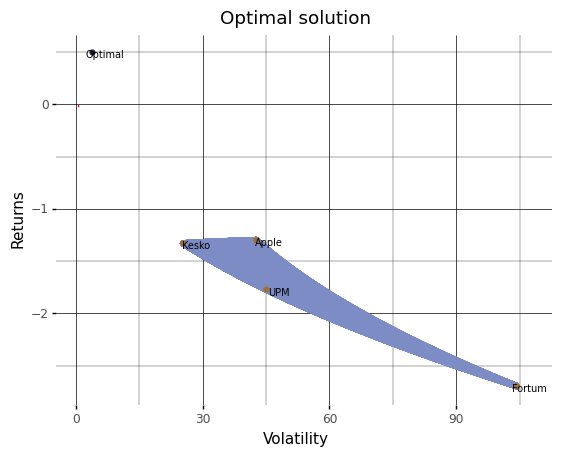

In [11]:
from entropy_pooling import markoviz_optimizer
optimal_x = markoviz_optimizer.optimizer(asset_scenarios, weighted_posterior, mu_0 = 0.5, visualize = True, verbose = 1).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(asset_scenarios.columns):
  if abs(optimal_x[i]) > 0.001:
    print("{}: {}% ".format(col, np.round(optimal_x[i]*100,decimals = 1)))

The optimization was succesful: True
Kesko: 73.6%
UPM: 24.4%
Fortum: -78.3%
Apple: 80.3%


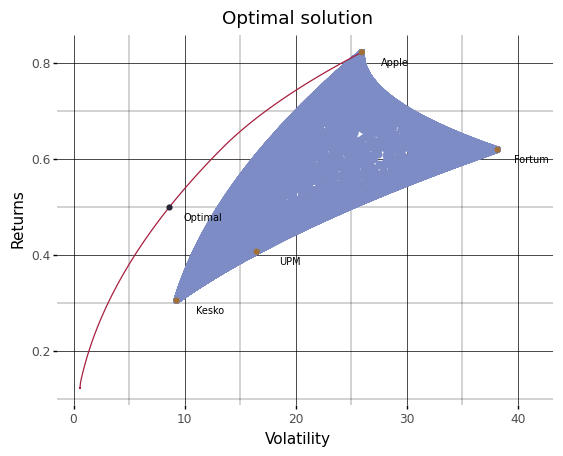

In [10]:
from entropy_pooling import markoviz_optimizer
optimal_x = markoviz_optimizer.optimizer(asset_scenarios, weights, mu_0 = 0.5, visualize = True, verbose = 1).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(asset_scenarios.columns):
  if abs(optimal_x[i]) > 0.001:
    print("{}: {}%".format(col, np.round(optimal_x[i]*100,decimals = 1)))